# Monte Carlo Option Pricing Demo

This notebook demonstrates how to use the `options_pricing.monte_carlo` module 
to compute **European call and put option prices** via Monte Carlo simulation.

Monte Carlo methods are particularly useful for:
- Pricing **path-dependent derivatives** (e.g. Asian, Barrier options).  
- Handling cases where **no closed-form solution** exists.  
- Validating analytical models such as Black–Scholes.


## 1. Import Libraries


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os


# Add the repo root (one level up from notebooks) to Python path
repo_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(repo_root)
# Import packages
from options_pricing.monte_carlo import monte_carlo_option_price
from options_pricing.black_scholes import black_scholes_price

## 2. Define Option Parameters


In [10]:
S = 100       # Spot price
K = 100       # Strike price
T = 1.0       # Time to maturity (years)
r = 0.05      # Risk-free rate
sigma = 0.2   # Volatility
M = 100_000   # Number of Monte Carlo simulations


## 3. Monte Carlo Simulation Results


In [11]:
call_price_mc = monte_carlo_option_price(S, K, T, r, sigma, option_type="call", n_simulations=M)
put_price_mc  = monte_carlo_option_price(S, K, T, r, sigma, option_type="put", n_simulations=M)

print(f"Monte Carlo Call Price (M={M}): {call_price_mc:.4f}")
print(f"Monte Carlo Put  Price (M={M}): {put_price_mc:.4f}")


Monte Carlo Call Price (M=100000): 10.4509
Monte Carlo Put  Price (M=100000): 5.5846


## 4. Comparison with Black–Scholes

Monte Carlo methods converge (as the number of simulations increases) 
to the **closed-form Black–Scholes price** for European options.


In [12]:
bs_call = black_scholes_price(S, K, T, r, sigma, option_type="call")
bs_put  = black_scholes_price(S, K, T, r, sigma, option_type="put")

print(f"Black–Scholes Call Price: {bs_call:.4f}")
print(f"Black–Scholes Put  Price: {bs_put:.4f}")


Black–Scholes Call Price: 10.4506
Black–Scholes Put  Price: 5.5735


## 5. Monte Carlo Convergence

We compute Monte Carlo estimates with increasing number of simulations 
to show convergence toward the Black–Scholes values.


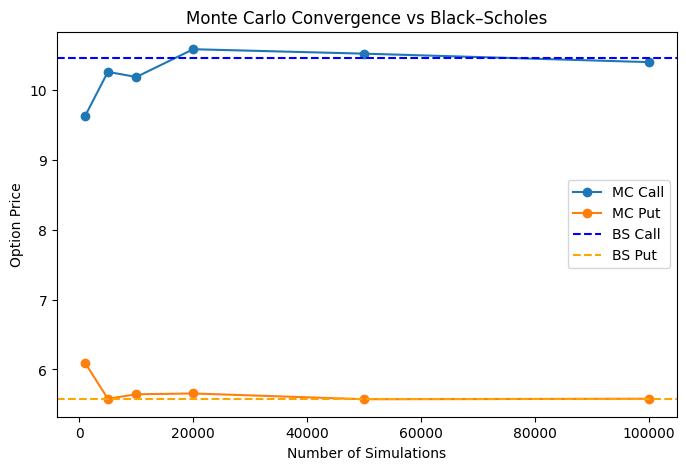

In [13]:
simulations = [1000, 5000, 10000, 20000, 50000, 100000]
call_estimates = [monte_carlo_option_price(S, K, T, r, sigma, option_type="call", n_simulations=m) for m in simulations]
put_estimates  = [monte_carlo_option_price(S, K, T, r, sigma, option_type="put", n_simulations=m) for m in simulations]

plt.figure(figsize=(8,5))
plt.plot(simulations, call_estimates, marker='o', label='MC Call')
plt.plot(simulations, put_estimates, marker='o', label='MC Put')
plt.axhline(bs_call, color='blue', linestyle='--', label='BS Call')
plt.axhline(bs_put, color='orange', linestyle='--', label='BS Put')
plt.title("Monte Carlo Convergence vs Black–Scholes")
plt.xlabel("Number of Simulations")
plt.ylabel("Option Price")
plt.legend()
plt.show()


## 6. Distribution of Simulated Payoffs

Monte Carlo simulation generates a distribution of discounted payoffs.  
We can visualize the histogram to better understand the randomness in pricing.


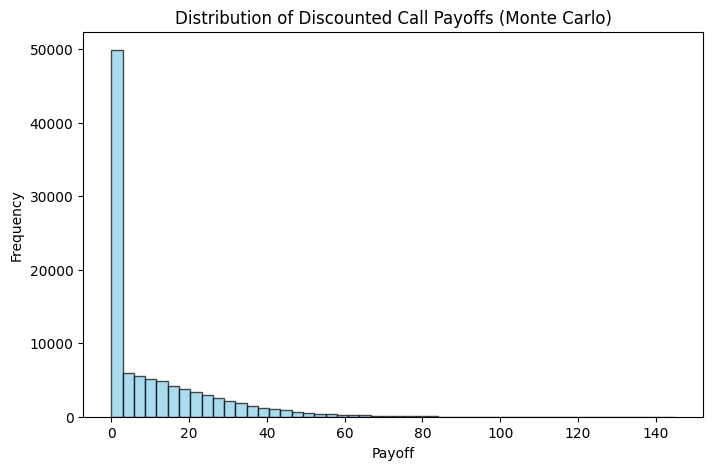

In [14]:
# Generate sample payoffs (reusing underlying MC implementation if possible)
np.random.seed(42)
Z = np.random.normal(0, 1, M)
ST = S * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)
payoffs_call = np.exp(-r * T) * np.maximum(ST - K, 0)

plt.figure(figsize=(8,5))
plt.hist(payoffs_call, bins=50, alpha=0.7, color='skyblue', edgecolor='k')
plt.title("Distribution of Discounted Call Payoffs (Monte Carlo)")
plt.xlabel("Payoff")
plt.ylabel("Frequency")
plt.show()


## 7. Summary

In this demo, we have:

- Implemented **Monte Carlo pricing** for European call and put options.  
- Shown convergence toward the **Black–Scholes closed-form solution**.  
- Visualized the **distribution of simulated payoffs**.  

Monte Carlo is flexible and essential for complex derivatives, 
though it converges more slowly than tree or PDE methods.
